In [3]:
import os
os.chdir('P:\SAMPLE DATA')

In [4]:
df=pd.read_excel('2016.xlsx')

In [5]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense

In [6]:
df.head(10)

,CMemNo,Description,Failed,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,SuppID,InvNet (SUM),Member Type,Town,Member Join Date
0,662914,Monthly Mobile Contract,NaN,2011-07-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-120.30,Agrevise - Full,Northampton,2008-05-08
1,662914,Monthly Mobile Contract,NaN,2011-10-25,2016-07-26,Mobile,MS-MOB,Telecoms,O00001,-73.37,Agrevise - Full,Northampton,2008-05-08
2,693482,Miscellaneous Items,NaN,2012-03-01,2017-01-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,King's Lynn,1997-03-20
3,663686,Miscellaneous Items,NaN,2012-09-11,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,2nd Account,Spalding,2011-06-08
4,671350,Miscellaneous Items,NaN,2012-10-19,2016-07-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1990-02-20
5,693412,Miscellaneous Items,NaN,2012-11-28,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Fakenham,1994-03-17
6,693225,Miscellaneous Items,NaN,2013-01-31,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Kings Lynn,1993-09-20
7,664339,Miscellaneous Items,NaN,2013-05-21,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Waitrose Farming Partnership - Full,Attleborough,2013-05-08
8,663201,Miscellaneous Items,NaN,2013-06-20,2016-05-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Colchester,2009-06-04
9,693264,Miscellaneous Items,NaN,2013-08-16,2016-06-26,General - Supplies,MS-MISC,General Supplies,W00052,-100.00,Full,Norwich,1966-04-25


In [8]:
df.shape

(591933, 13)

In [9]:
df.isnull().sum()

CMemNo                   0
Description             40
Failed              589538
InvDate                  0
InvPaymentDate           0
ProdCategory             1
ProdCode                 1
ProductAreaName          1
SuppID               26924
InvNet (SUM)             1
Member Type              0
Town                     0
Member Join Date         0
dtype: int64

In [10]:
df['Time for payment'] = (df['InvPaymentDate'] - df['InvDate']).dt.days

In [11]:
df.drop(['Description','SuppID'], axis=1, inplace=True)

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(2395, 12)

In [14]:
df.rename(columns={'Failed':'payment'}, inplace=True)

In [15]:
df['payment']=df['payment'].fillna('success')

In [13]:
#df['Description'].unique()

In [16]:
df['ProdCategory'].unique()

array(['Tyres', 'General - Machinery', 'Feed', 'Liquid',
       'Building Materials', 'Insurance', 'General Services',
       'Fixed & Broadband', 'General - Supplies', 'Charge card',
       'LPG & Solid fuels', 'Agrochemicals',
       'Vet fees & Animal Health / Semen', 'Capital', 'Hire',
       'Rodenticides', 'Mobile', 'Agrochemicals Non Levy', 'Seed',
       'Accounts', 'Hardware', 'Tractor Hire', 'Non Levy',
       'Non HH, mains gas, MOP', 'Livestock Products', 'Fuel Cards',
       'Fertiliser', 'Rebates to Members', 'Labour', 'Liquid 10,000Ltrs+'],
      dtype=object)

In [19]:
subset = df.sample(n=100000, replace=True)

In [ ]:
subset.reset_index(inplace=True)

In [57]:
subset.drop('index', axis=1, inplace=True)

In [58]:
subset.shape

(100000, 12)

In [59]:
df=subset.copy()

In [60]:
df1=subset.copy()

In [61]:
df.dtypes

CMemNo                       int64
payment                     object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
Time for payment             int64
dtype: object

custom_pipeline = [preprocessing.fillna,
                   #preprocessing.lowercase,
                   preprocessing.remove_whitespace,
                   preprocessing.remove_diacritics
                   #preprocessing.remove_brackets
                  ]
df['clean_text'] = hero.clean(df['Description'], custom_pipeline)
df['clean_text'] = [n.replace('{','') for n in df['clean_text']]
df['clean_text'] = [n.replace('}','') for n in df['clean_text']]
df['clean_text'] = [n.replace('(','') for n in df['clean_text']]
df['clean_text'] = [n.replace(')','') for n in df['clean_text']]

In [3]:
if 5>6:
 print('hello world')
else:
  print('hello mate')

hello mate


In [62]:
df

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date,Time for payment
0,671085,success,2016-06-04,2016-07-26,Building Materials,BU-GEN,Building Materials,77.94,Associate,Holt,1976-04-06,52
1,694533,success,2016-10-25,2016-11-26,Liquid,FL-GO,Liquid Fuel,1723.26,Waitrose Farming Partnership - Full,Wokingham,2015-04-30,32
2,671342,success,2016-12-31,2017-01-28,Fuel Cards,FL-CARD,Fuel Cards,2.00,Tesco ProducerClub – Full,Norwich,1990-01-01,28
3,670763,success,2016-12-31,2017-01-26,Accounts,AF-SUBSASSOC,Non Service Charge,145.00,Associate,Chipping Campden,2014-07-01,26
4,611042,success,2016-05-31,2016-06-28,Agrochemicals,CH-CYFL1,Crop Protection,166.66,Borders Machinery Ring,Berwick Upon Tweed,2004-12-03,28
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,640068,success,2016-02-29,2016-03-20,Agrochemicals,CH-FLEXI500,Crop Protection,468.80,Full,Cambridge,2006-07-01,20
99996,670444,success,2016-04-01,2016-04-26,Charge card,MS-BARCLAYCARD,Non Service Charge,31.01,Associate,Scottow,2014-04-02,25
99997,663061,success,2016-07-06,2016-08-31,Agrochemicals,CH-SAMU20,Crop Protection,297.00,Full,Huntingdon,2008-10-15,56
99998,693258,success,2016-06-27,2016-07-27,General - Machinery,MC-MS,Machinery,16.00,Full,Kings Lynn,1982-05-13,30


In [72]:
#df1['tfidf'] = (hero.tfidf(df1['clean_text'], max_features=3000))

In [63]:
df2.dtypes

CMemNo                       int64
payment                     object
InvDate             datetime64[ns]
InvPaymentDate      datetime64[ns]
ProdCategory                object
ProdCode                    object
ProductAreaName             object
InvNet (SUM)               float64
Member Type                 object
Town                        object
Member Join Date    datetime64[ns]
Time for payment             int64
dtype: object

In [64]:
df2=df1.copy()

In [65]:
from datetime import datetime

In [66]:
df2['Time for payment'] = (df2['InvPaymentDate'] - df2['InvDate']).dt.days

In [67]:
df2.shape

(100000, 12)

In [68]:
df2.tail()

,CMemNo,payment,InvDate,InvPaymentDate,ProdCategory,ProdCode,ProductAreaName,InvNet (SUM),Member Type,Town,Member Join Date,Time for payment
99995,640068,success,2016-02-29,2016-03-20,Agrochemicals,CH-FLEXI500,Crop Protection,468.80,Full,Cambridge,2006-07-01,20
99996,670444,success,2016-04-01,2016-04-26,Charge card,MS-BARCLAYCARD,Non Service Charge,31.01,Associate,Scottow,2014-04-02,25
99997,663061,success,2016-07-06,2016-08-31,Agrochemicals,CH-SAMU20,Crop Protection,297.00,Full,Huntingdon,2008-10-15,56
99998,693258,success,2016-06-27,2016-07-27,General - Machinery,MC-MS,Machinery,16.00,Full,Kings Lynn,1982-05-13,30
99999,640071,success,2016-07-12,2016-08-26,Hire,MC-HIRE,Machinery,97.50,Full Plus,Huntingdon,2006-07-01,45


In [380]:
#df2.drop(['clean_text','index'],axis=1, inplace=True)

In [386]:
#df2.reset_index(inplace=True)

In [287]:
#train_data=df2.iloc[:80000,:]

In [288]:
#test_data = df2.drop(train_data.index)

In [33]:
#df2.drop(['Description','SuppID'],axis=1, inplace=True)

In [1]:
df2.isnull().sum()

NameError: name 'df2' is not defined

([<matplotlib.patches.Wedge at 0x2850f488700>,
 [Text(-0.012682249728465576, -1.099926888725712, 'success'),
  Text(0.013835095508096909, 1.1999202432379754, 'Failed')],
 [Text(-0.006917590760981222, -0.5999601211231156, '99.6%'),
  Text(0.008070472379723196, 0.6999534752221523, '0.4%')])

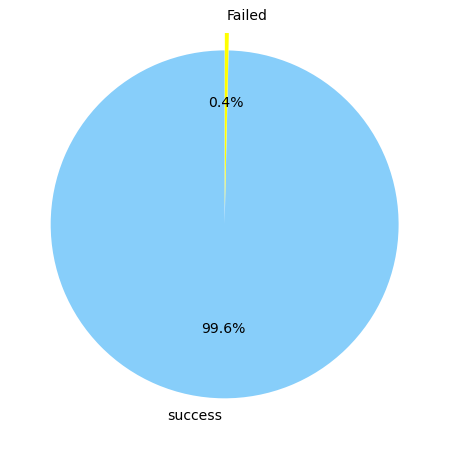

In [70]:
plt.rcParams['figure.figsize']=8,8
labels=df['payment'].value_counts().index.tolist()
sizes=df['payment'].value_counts().tolist()
explode=(0,0.1)
colors=['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})

([<matplotlib.patches.Wedge at 0x2b737265610>,
 [Text(-0.014962873217541053, -1.099898228212536, 'success'),
  Text(0.016323057184208158, 1.199888977282549, 'Failed')],
 [Text(-0.008161567209567845, -0.5999444881159287, '99.6%'),
  Text(0.00952178335745476, 0.6999352367481535, '0.4%')])

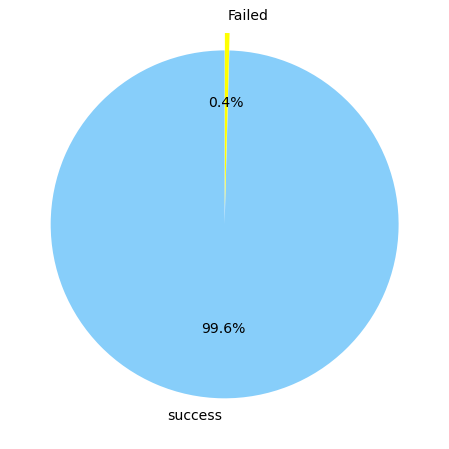

In [42]:
plt.rcParams['figure.figsize']=8,8
labels=df2['payment'].value_counts().index.tolist()
sizes=df2['payment'].value_counts().tolist()
explode=(0,0.1)
colors=['lightskyblue','yellow']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle=90, textprops={'fontsize':14})

In [73]:
df2['ProductAreaName'].groupby(df2['payment']).describe()

,count,unique,top,freq
payment,,,,
Failed,367,16,Machinery,103
success,99633,21,Machinery,20279


In [4]:
import random
x = random.randrange(1,100)

In [8]:
print(random.randrange(1,100))

45


In [7]:
df2['ProductAreaName'].groupby(df2['Town']).describe()

NameError: name 'df2' is not defined

In [54]:
pd.set_option('display.max_rows', None)

In [55]:
d=df2['ProductAreaName'].groupby(df2['Town']).describe()

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='payment', ylabel='count'>

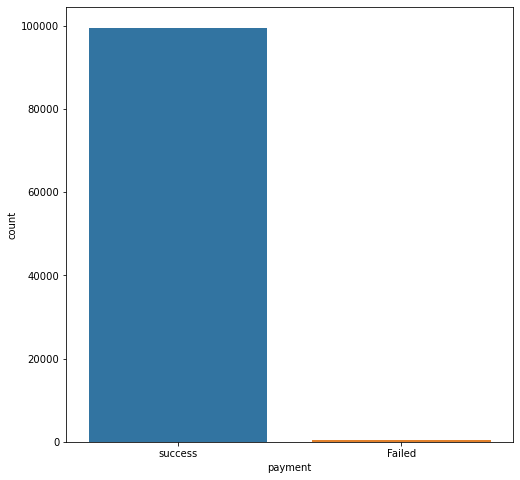

In [57]:
#count plot for declined payment

df2['payment']=df2.payment.replace([1,0],['success','Failed'])
paymentrate=df2['payment']
sns.countplot(paymentrate)

In [60]:
df['ProdCategory'].unique()

array(['Fixed & Broadband', 'Fuel Cards', 'Rebates to Members',
       'General - Machinery', 'Seed', 'Non HH, mains gas, MOP',
       'General - Supplies', 'Agrochemicals', 'Mobile',
       'Building Materials', 'Charge card', 'Electricity HH',
       'Livestock Products', 'Hardware', 'Tyres', 'Liquid', 'Fertiliser',
       'Feed', 'Labour', 'Accounts', 'Insurance', 'LPG & Solid fuels',
       'Vet fees & Animal Health / Semen', 'Agrochemicals Non Levy',
       'Hire', 'General Services', 'Non Levy', 'Tractor Hire', 'Capital',
       'Liquid 10,000Ltrs+', 'Rodenticides', 'Renewable Services',
       'General Supplies Non Levy', 'Build Materials Non Levy',
       'Seed Non Levy'], dtype=object)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

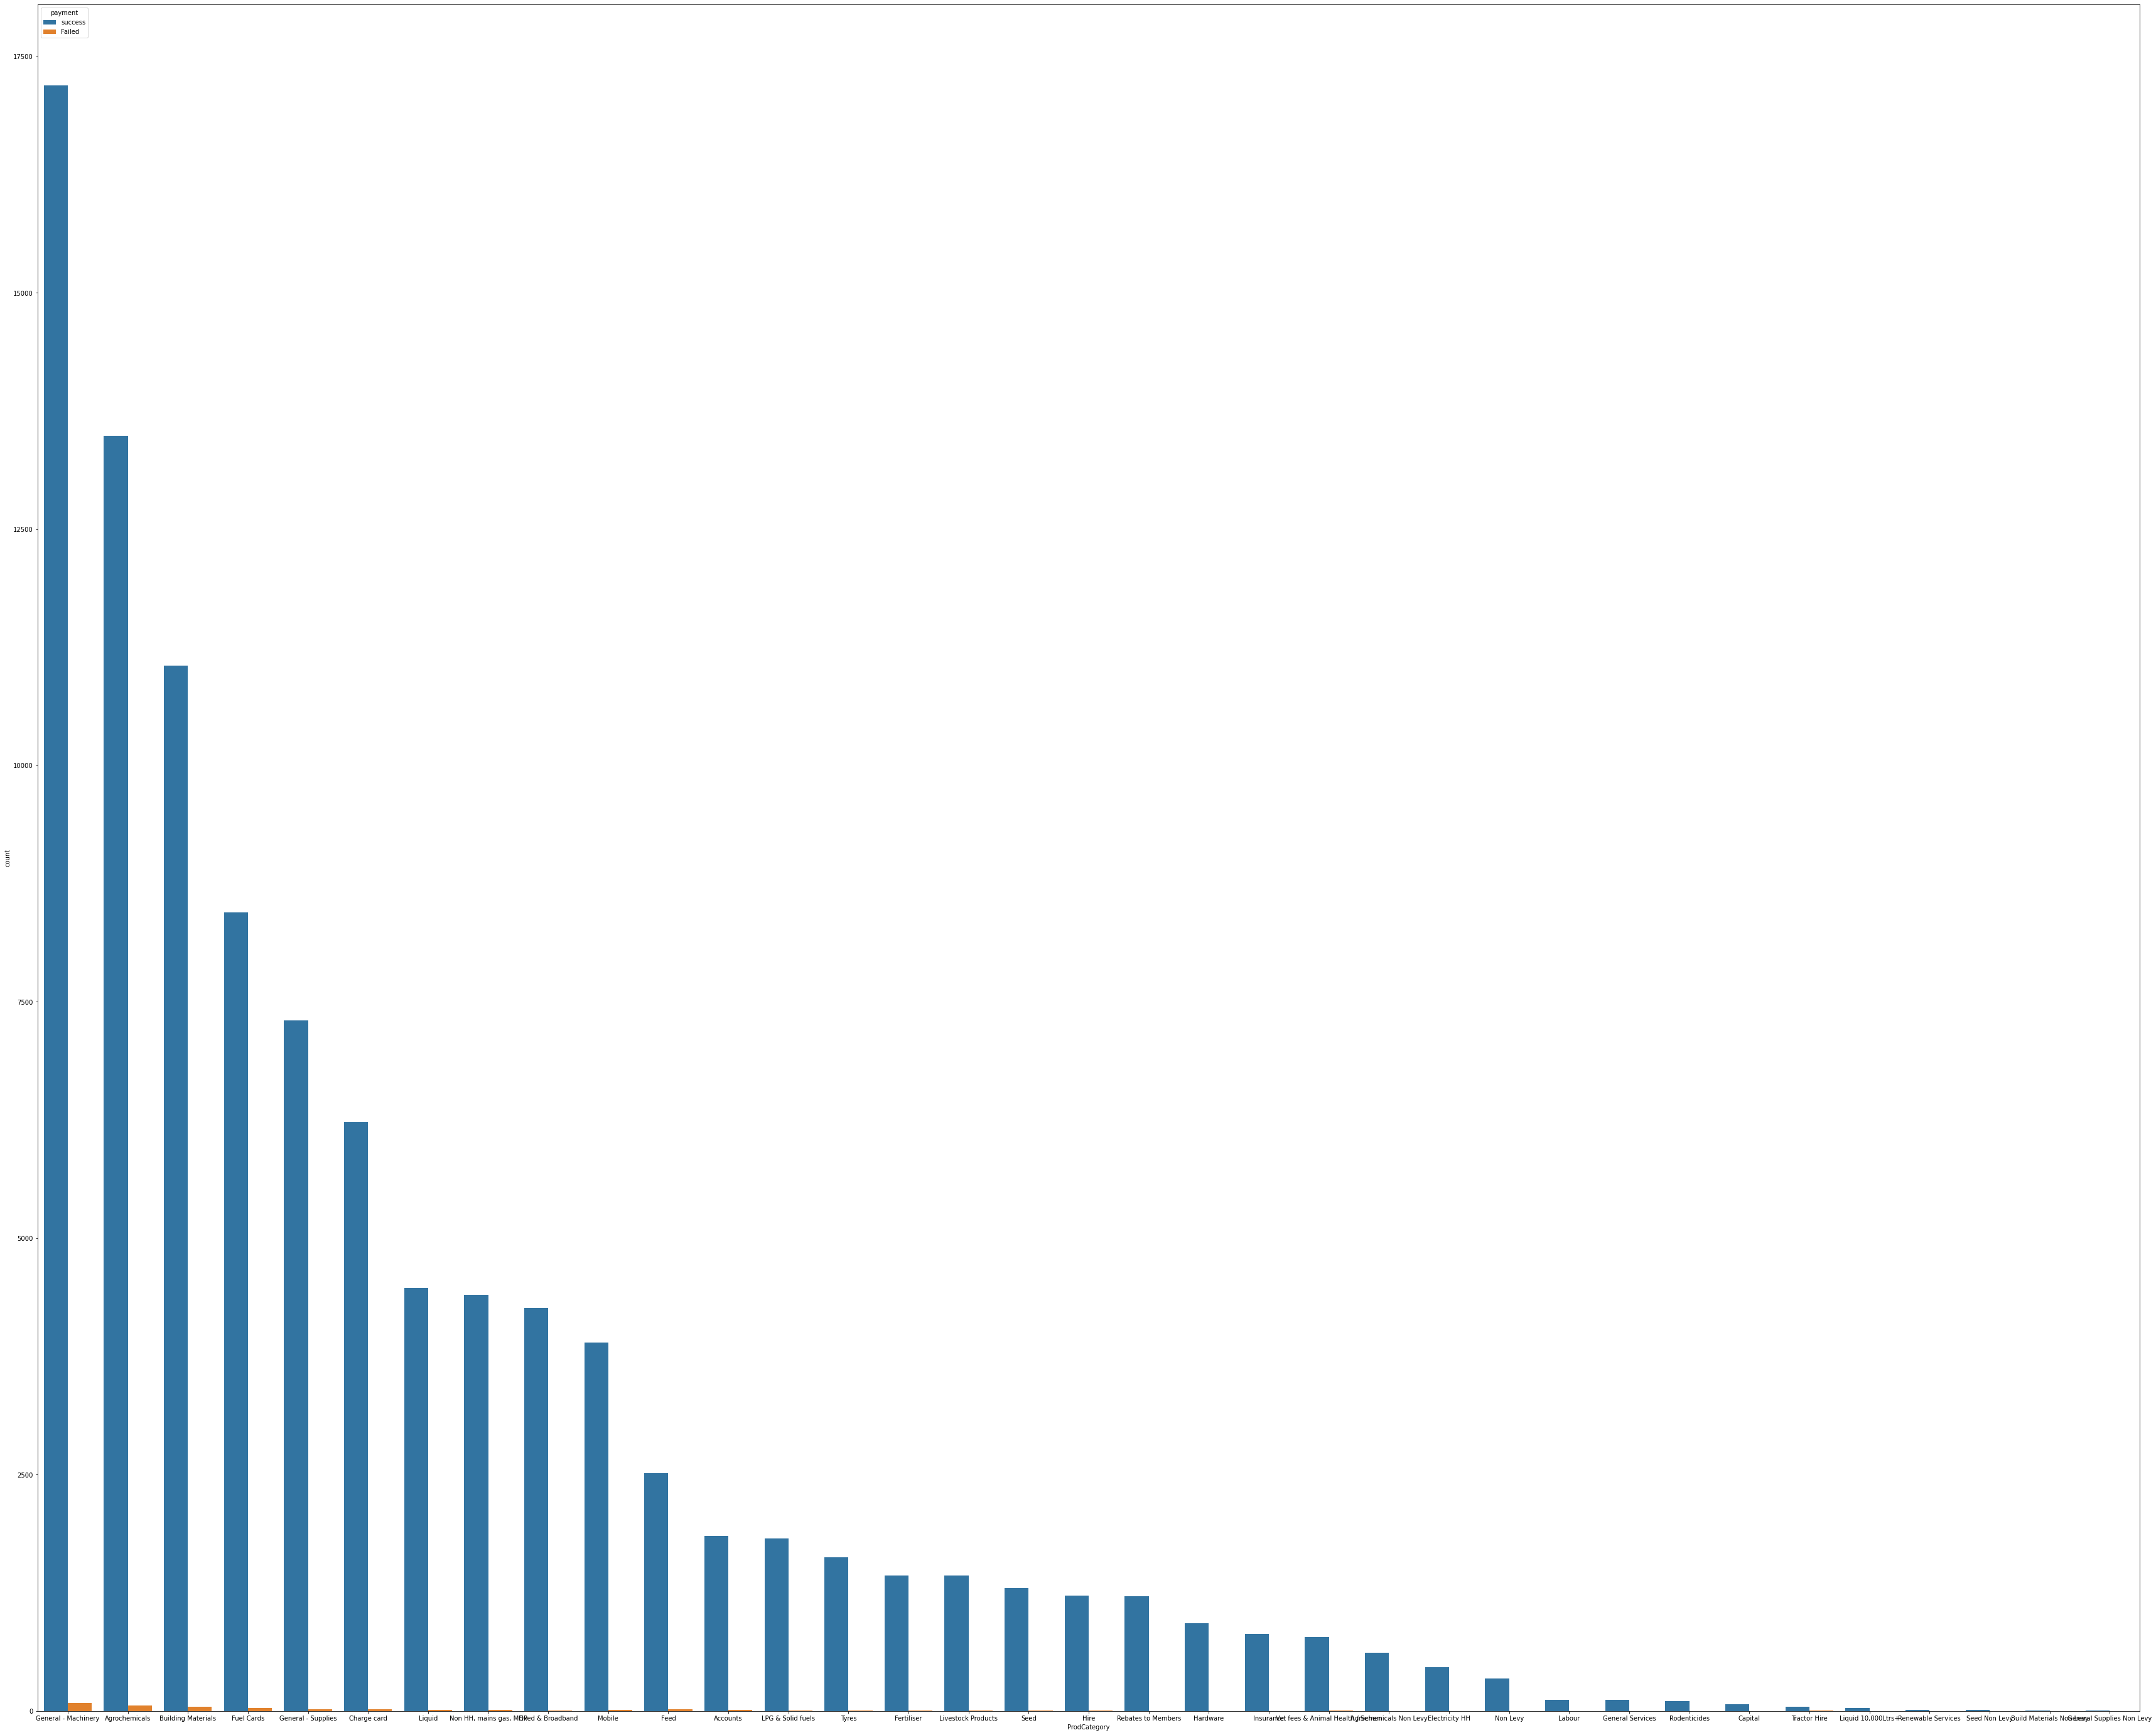

In [89]:
plt.figure(figsize=(60,50))
paymentrate=df['ProdCategory']

sns.countplot(paymentrate,hue=df2['payment'],order = df['ProdCategory'].value_counts().index)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

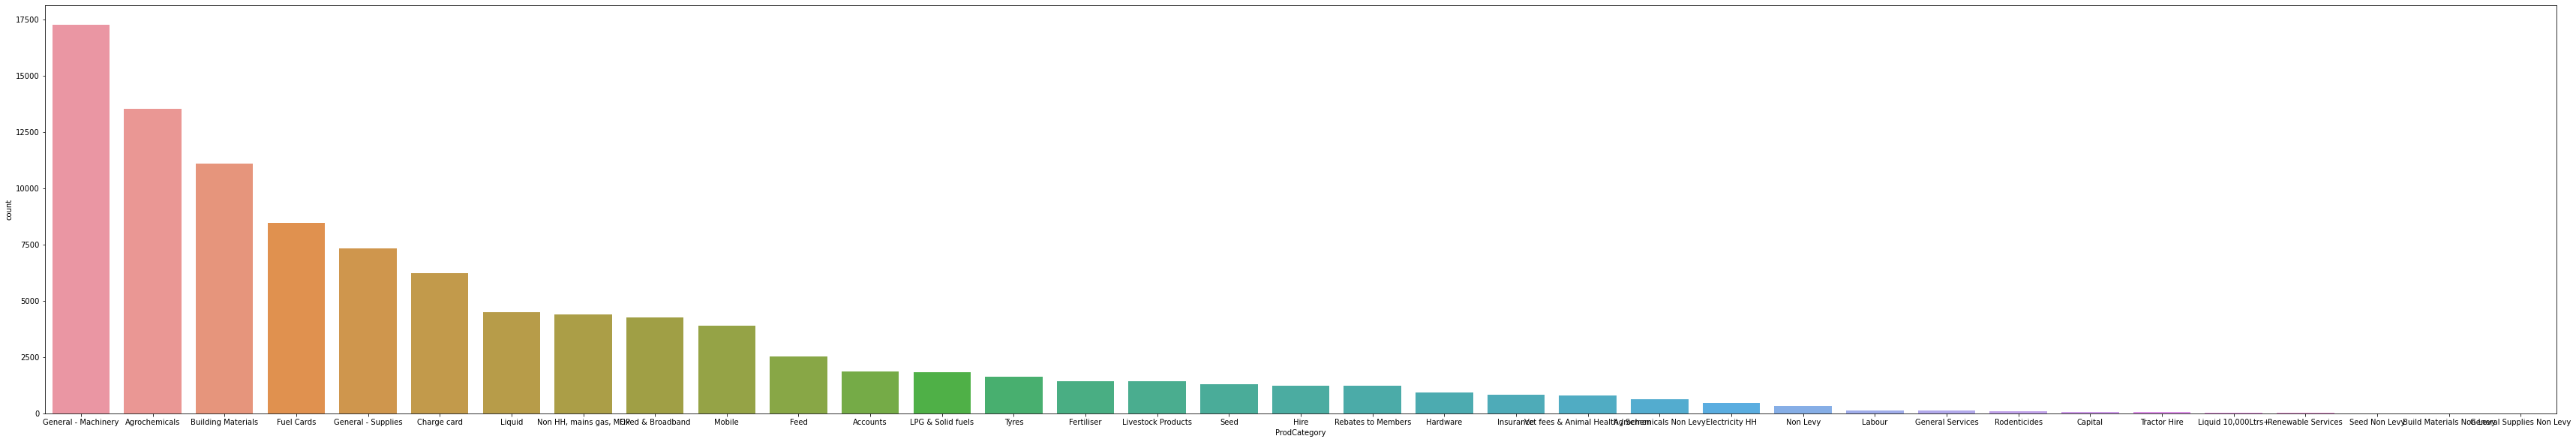

In [77]:
plt.figure(figsize=(60,10))
paymentrate=df['ProdCategory']
sns.countplot(paymentrate,order = df['ProdCategory'].value_counts().index)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ProdCategory', ylabel='count'>

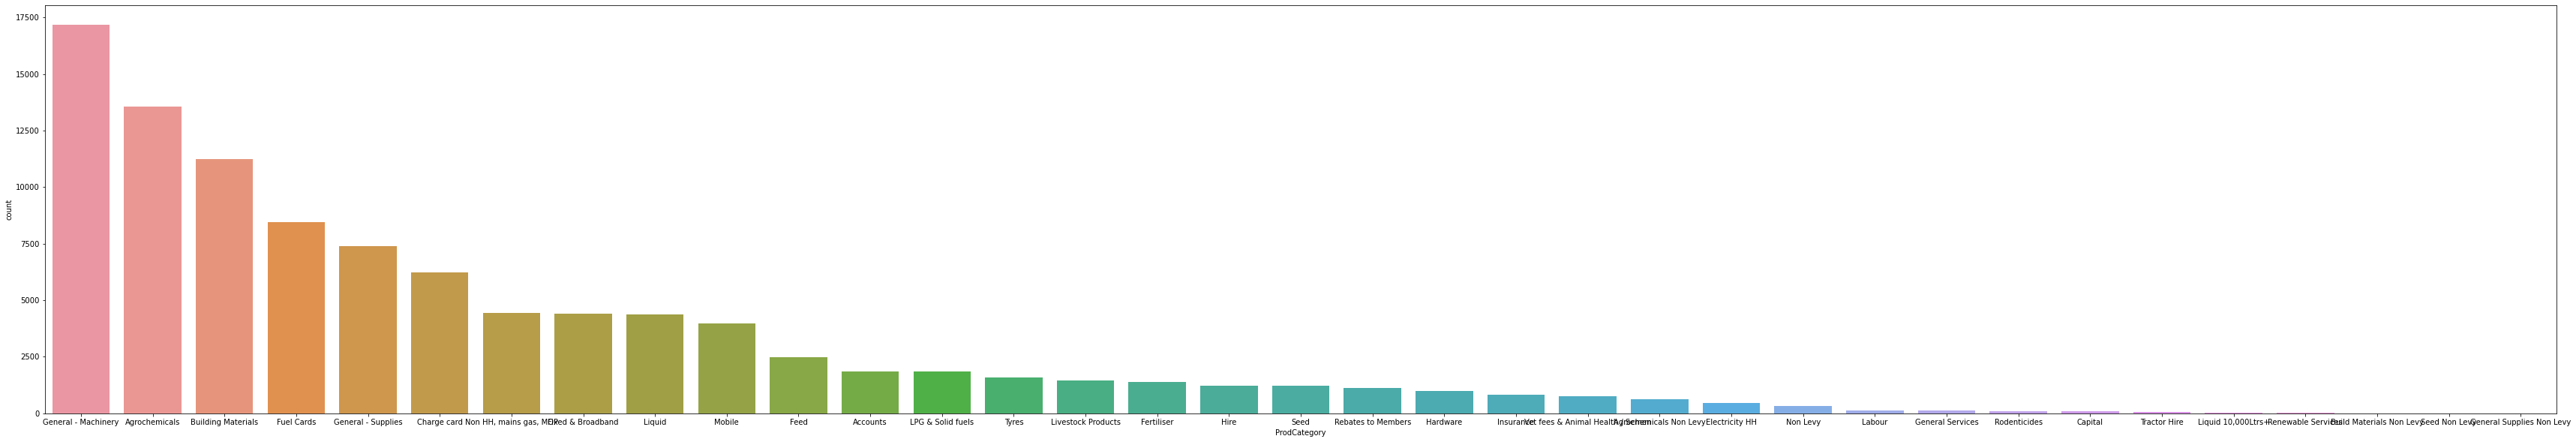

In [135]:
plt.figure(figsize=(60,10))
paymentrate=df2['ProdCategory']
sns.countplot(paymentrate,order = df2['ProdCategory'].value_counts().index)

In [66]:
df.shape

(100000, 13)

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='ProductAreaName', ylabel='count'>

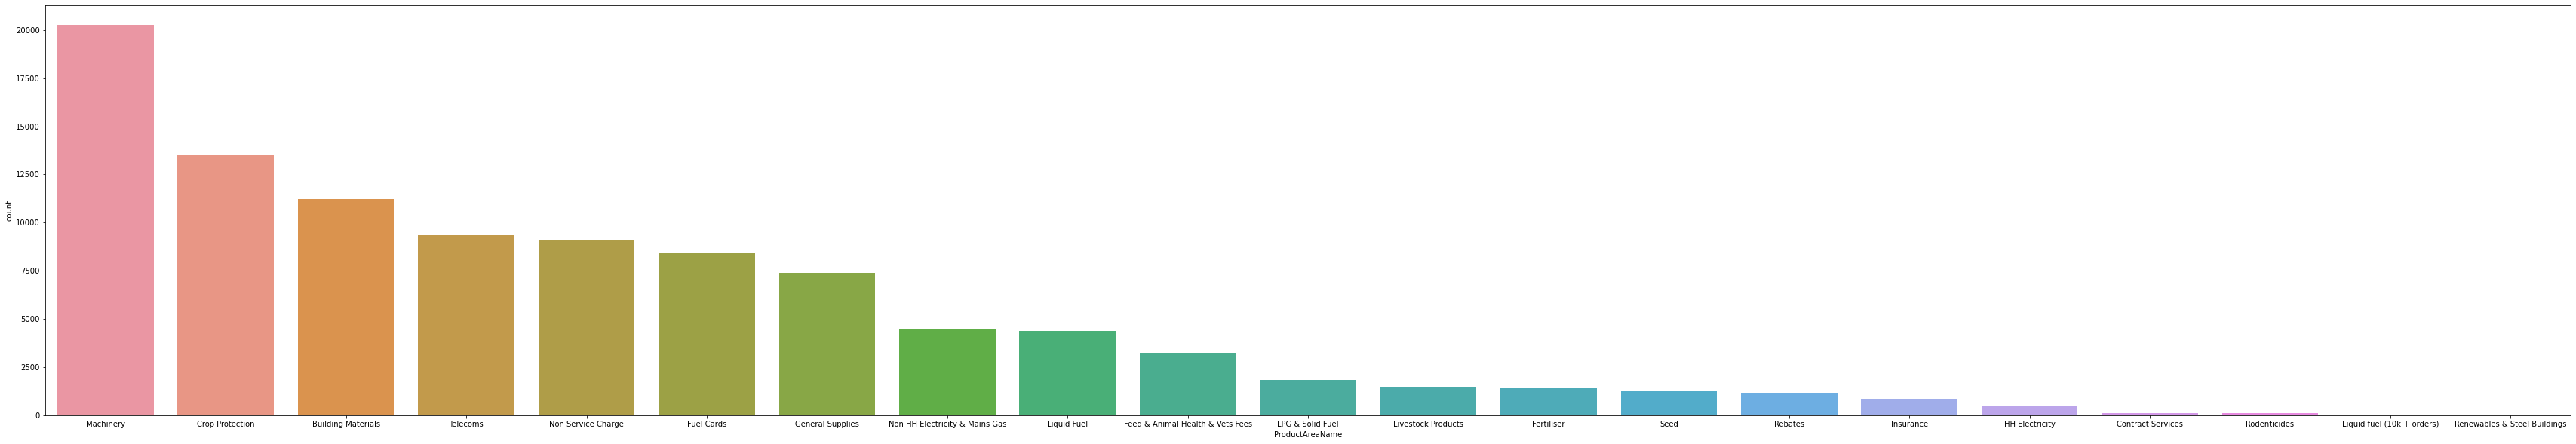

In [134]:
plt.figure(figsize=(60,10))
paymentrate=df2['ProductAreaName']
sns.countplot(paymentrate, order = df2['ProductAreaName'].value_counts().index)

plt.figure(figsize=(60,10))
paymentrate=df2['Member Type']
sns.countplot(paymentrate)

In [90]:
d=df2.groupby(["payment", "Member Type"])["ProductAreaName"].agg(["value_counts"])

In [94]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(d)

                                                                                          value_counts
payment Member Type                                     ProductAreaName                               
Failed  2nd Account                                     Building Materials                          14
                                                        Crop Protection                              5
                                                        Non Service Charge                           2
                                                        Fertiliser                                   1
        Agrevise - Full                                 Building Materials                           1
        Associate                                       Machinery                                   24
                                                        Building Materials                          20
                                                        Non Service Charg

In [92]:
data=pd.DataFrame(d)

In [93]:
d#use grid search CV to find best parameters for Random Forest Classifier

cv_result = {}
best_estimators = {}
best_params = {}
    
clf = GridSearchCV(RandomForestClassifier(), 
                   param_grid = {"max_features": ["log2","Auto","None"],
                 "min_samples_split":[2,3,5],
                 "min_samples_leaf":[1,3,5],
                 "bootstrap":[True,False],
                 "n_estimators":[5, 10, 50,100,150],
                 'max_depth' : [3, 5, 7, 9],
                 "criterion":["gini","entropy"]},
                   cv =10, scoring = 'f1', 
                   n_jobs = -1, 
                   verbose = False)

clf.fit(X_resampled,y_resampled)
cv_result = clf.best_score_
best_estimators = clf.best_estimator_
best_params = clf.best_params_

value_counts
payment Member Type                         ProductAreaName                 
Failed  2nd Account                         Building Materials            14
                                            Crop Protection                5
                                            Non Service Charge             2
                                            Fertiliser                     1
        Agrevise - Full                     Building Materials             1
...                                                                      ...
success Waitrose Farming Partnership - Full Fertiliser                    13
                                            LPG & Solid Fuel              12
                                            Contract Services              3
                                            HH Electricity                 3
                                            Rodenticides                   1

[561 rows x 1 columns]

In [95]:
county=df2[df2['payment']=='Failed'].groupby(['Town']).size().reset_index(name='count')

In [107]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(county)

               Town  count
0       Aberystwyth      1
1      Attleborough      5
2           Beccles     10
3          Bridport      4
4            Bungay      5
5   Bury St Edmunds      4
6           Dereham     68
7              Diss      3
8    Downham Market     10
9      East Dereham      9
10              Ely      5
11         Fakenham      8
12  Flyford Flavell      2
13       Halesworth      9
14        Harleston     11
15       Huntingdon     15
16        Kettering      1
17      King's Lynn     75
18       Kings Lynn     51
19        Leicester      1
20          Norfolk      1
21          Norwich     82
22    Old Buckenham      3
23     Peterborough      5
24           Ramsey      1
25         Richmond      7
26   Saffron Walden     12
27         Shipdham      7
28    South Ruislip      1
29         Thetford     11
30          Wisbech      6


<AxesSubplot:xlabel='Town', ylabel='count'>

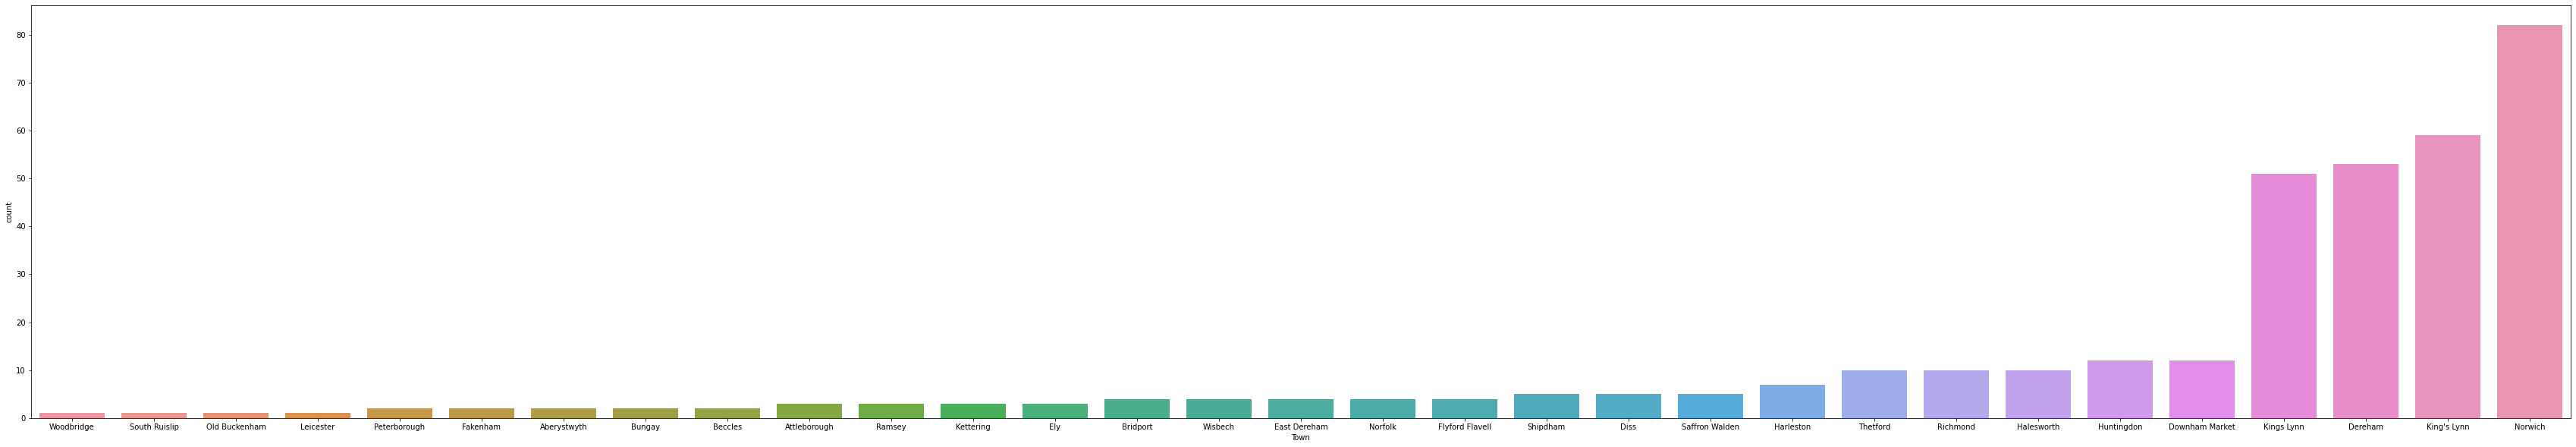

In [114]:
plt.figure(figsize=(60,10))
sns.barplot(x='Town',y='count', data=county, order=county.sort_values('count').Town)

In [116]:
county=df2[df2['payment']=='Failed'].groupby(['CMemNo']).size().reset_index(name='memno')

In [120]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(county)

    CMemNo  memno
0   610120      3
1   611921     14
2   611925      7
3   613036      1
4   613310     12
5   633048      1
6   640084      1
7   640085      3
8   640127      1
9   645016      4
10  661971      8
11  662056      2
12  662077      7
13  662163     37
14  662209      8
15  662288      5
16  662450      2
17  662769     19
18  662876      1
19  662952      4
20  662986      4
21  663008      5
22  663115      2
23  663134     14
24  663142      1
25  663383     27
26  663456      2
27  663747      1
28  663772      1
29  663934      1
30  664054      8
31  664397     11
32  664458      1
33  664463      3
34  664485     10
35  664513      3
36  665217      5
37  670009      2
38  670119      2
39  671029      1
40  671194      5
41  671469      6
42  671684      2
43  671749      2
44  671789      3
45  671824      5
46  693067      1
47  693072      6
48  693145     59
49  693227      1
50  693306      8
51  693308      3
52  693454      5
53  693476      4
54  693490

<AxesSubplot:xlabel='CMemNo', ylabel='memno'>

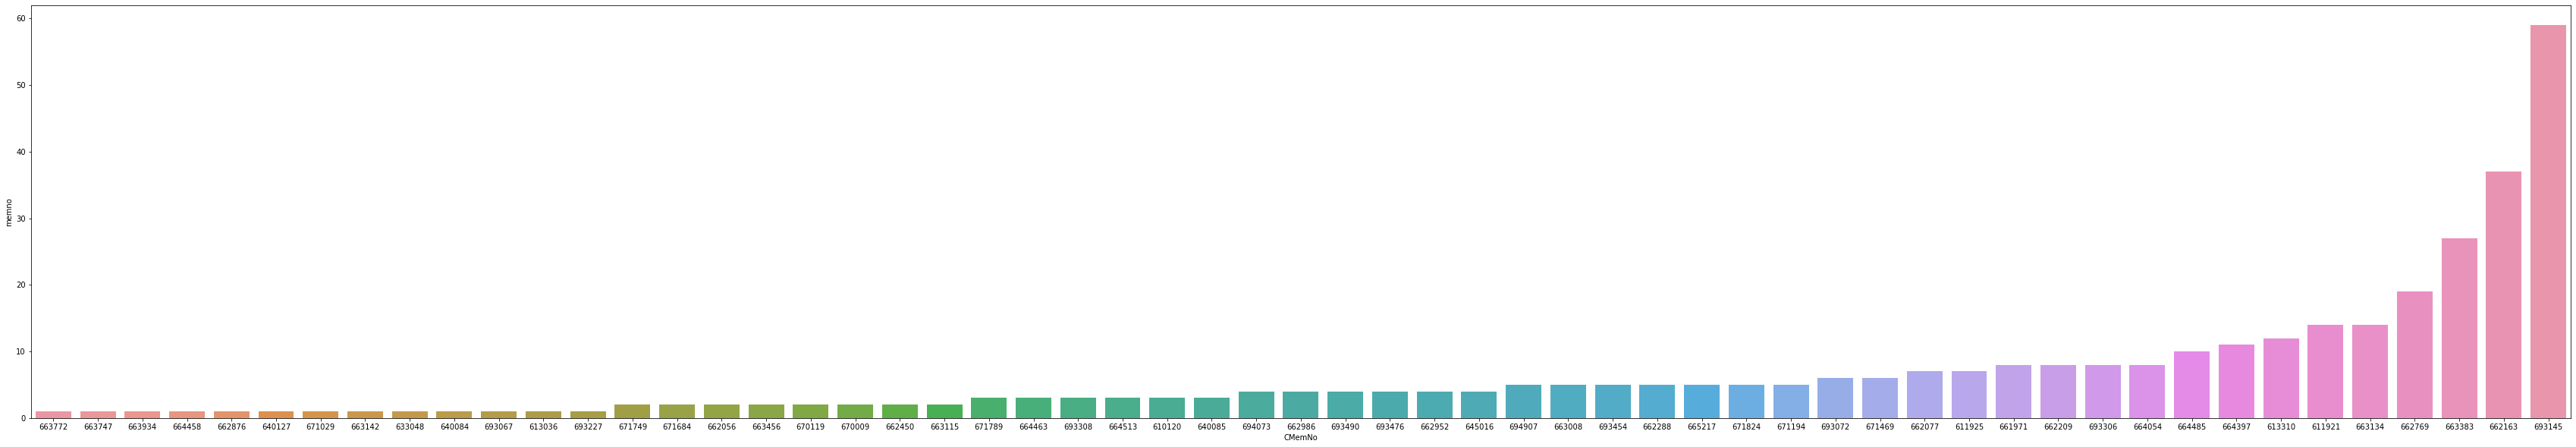

In [119]:
plt.figure(figsize=(60,10))
sns.barplot(x='CMemNo',y='memno', data=county, order=county.sort_values('memno').CMemNo)

In [125]:
data=df2[df2.payment == 'Failed']

In [111]:
county=df2[df2['payment']=='success'].groupby(['Town']).size().reset_index(name='count')

In [112]:
with pd.option_context('display.max_rows',None,'display.max.columns', None):
    print(county)

                       Town  count
0                         .      1
1            70 Orford Road     12
2                  Aberdeen      1
3               Abergavenny     23
4               Aberystwyth     38
5                  Abingdon    130
6                    Aboyne     41
7                      Acle     14
8                 Aldeburgh     11
9                    Aldeby     12
10               Alexandria     12
11                   Alford      9
12             Allteborough      1
13                   Alness      1
14                  Alnwick      4
15                    Alton      4
16                Ambleside      7
17                    Annan     12
18                  Appleby      3
19                 Arbroath      8
20                Ardersier      6
21                Ashbourne     17
22                  Ashkirk      1
23            Ashwellthorpe     33
24                 Aspatria      6
25               Atherstone      3
26             Attleborough   1785
27              Attl

In [100]:
#import plotly.express as px

In [104]:
#px.choropleth(county,
                    #locations = "country",
                    #color= "count", 
                    #hover_name= "country", # column to add to hover information
                    #color_continuous_scale=px.colors.sequential.Plasma,
                    #title="f visitors")

In [117]:
#day diff for the first payment is member join date to the invdate
df2['first invoice']=(df2['InvDate']-df2['Member Join Date']).dt.days

In [119]:
#day diff between the payment made and membershit join date is considered to be the payment date
df2['payment date']=(df2['InvPaymentDate']-df2['Member Join Date']).dt.days

In [121]:
#month of the invoice 
df2["invoiced month"] = pd.to_datetime(df2["InvDate"], format = "%d/%m/%Y").dt.month

In [123]:
#payment month
df2['month of payment']=pd.to_datetime(df2["InvPaymentDate"], format="%d/%m/%Y").dt.month

In [125]:
#members joined year and month
df2['year of joning']=pd.to_datetime(df2["Member Join Date"], format="%d/%m/%Y").dt.year
df2['month of joining']=pd.to_datetime(df2["Member Join Date"], format="%d/%m/%Y").dt.month
df2['day of joining']=pd.to_datetime(df2["Member Join Date"], format="%d/%m/%Y").dt.day

In [143]:
df2['date of invoicing']=pd.to_datetime(df2["InvDate"], format="%d/%m/%Y").dt.day

In [144]:
df2['date of payment']=pd.to_datetime(df2["InvPaymentDate"], format="%d/%m/%Y").dt.day

<AxesSubplot:xlabel='year of joning', ylabel='count'>

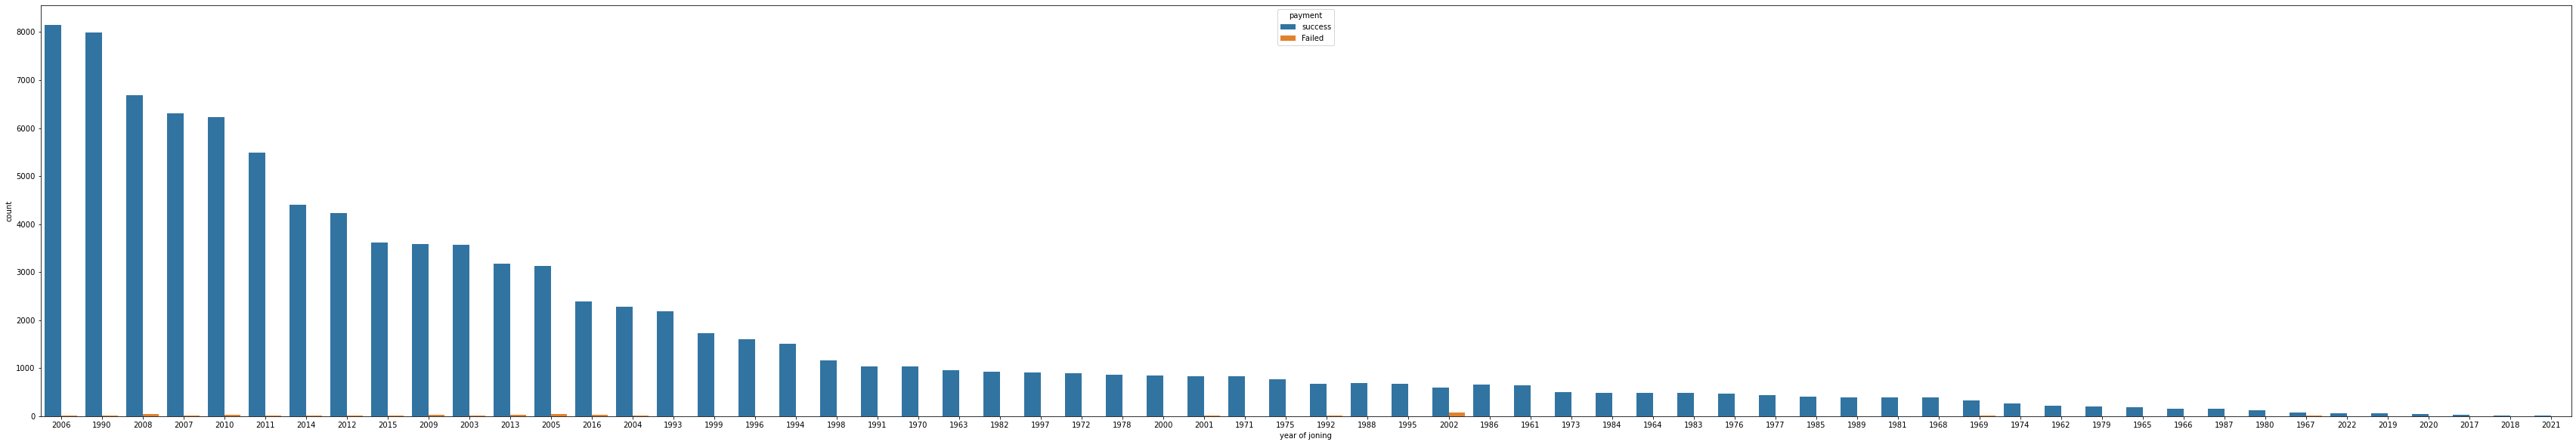

In [133]:
plt.figure(figsize=(60,10))
sns.countplot(x='year of joning', hue='payment', data=df2,order = df2['year of joning'].value_counts().index)

<AxesSubplot:xlabel='day of joining', ylabel='count'>

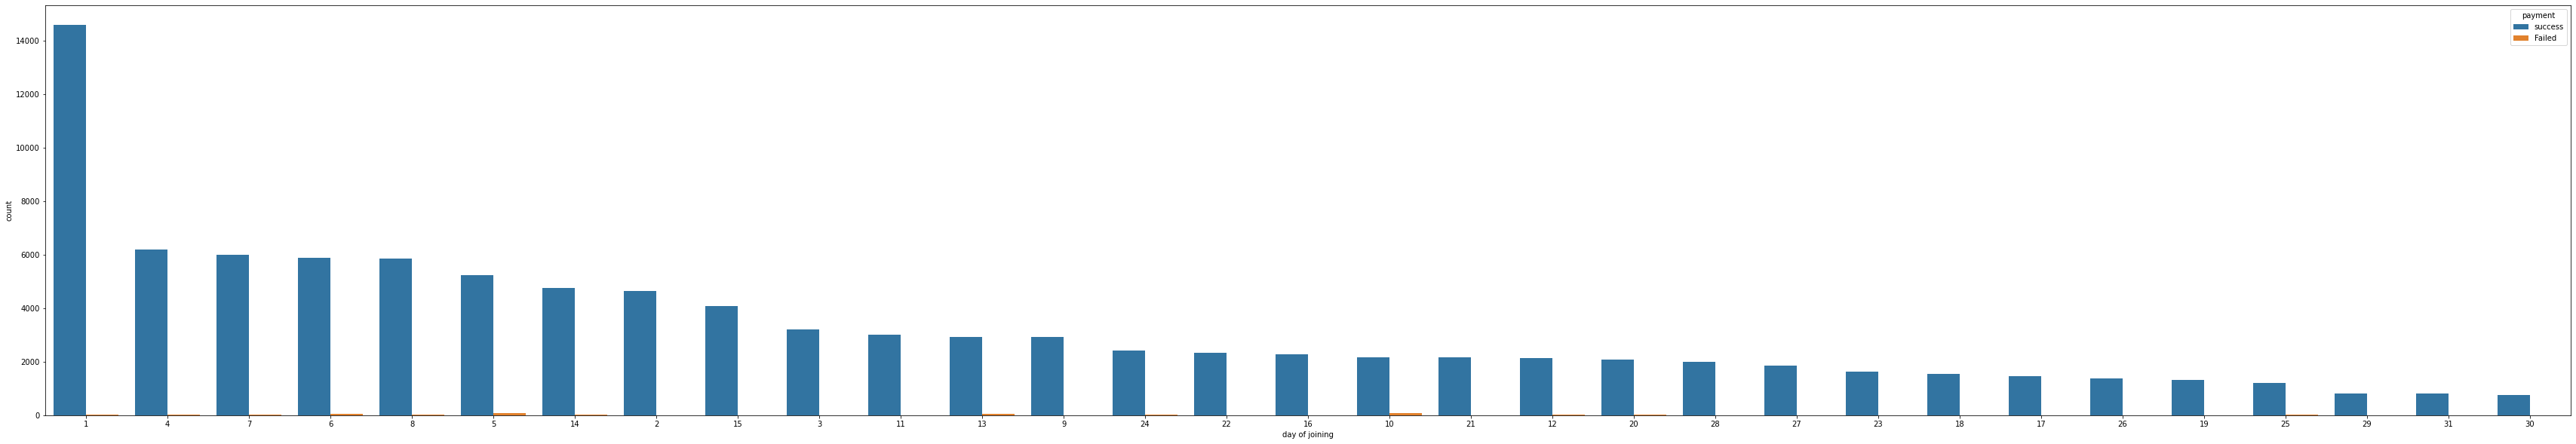

In [132]:
plt.figure(figsize=(60,10))
sns.countplot(x='day of joining', hue='payment', data=df2, order = df2['day of joining'].value_counts().index)

In [140]:
df2['Member Type'].value_counts()

Full                                               60913
Associate                                          15897
2nd Account                                         6080
Full Plus                                           2704
Waitrose Farming Partnership - Full                 2240
AF First Milk                                       1958
Samco and Shrim                                     1602
Staff                                               1332
Tesco ProducerClub – Full                            942
Shareholders sub account                             631
Orion Farming Group - Associate                      618
Waitrose Farming Partnership - Associate             594
Agrevise - Full                                      501
Morrisons - Full                                     487
Borders Machinery Ring                               480
Prompt Pay - Full                                    349
Billing Account - Full                               334
2nd Account - Full Plus        

In [148]:
df2

,CMemNo,payment,ProdCategory,ProductAreaName,InvNet (SUM),Member Type,Town,Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,day of joining,date of invoicing,date of payment
0,662854,success,Fixed & Broadband,Telecoms,12.75,Associate,Hunstanton,43,3148,3191,11,12,2008,4,3,15,28
1,615105,success,Fuel Cards,Fuel Cards,205.73,Samco and Shrim,Bishops Stortford,26,3529,3555,12,1,2007,5,4,31,26
2,693391,success,Rebates to Members,Rebates,-69.55,Full,Fakenham,26,8191,8217,4,5,1993,11,26,30,26
3,663348,success,General - Machinery,Machinery,3.03,Full,Sedgeford,29,2188,2217,2,3,2010,3,4,29,29
4,673746,success,Fuel Cards,Fuel Cards,90.33,Staff,Norwich,26,653,679,7,8,2014,10,17,31,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,610161,success,General - Machinery,Machinery,4.75,Full,Grantham,42,4725,4767,6,7,2003,7,8,14,26
99996,663109,success,Fuel Cards,Fuel Cards,39.14,Shareholders sub account,Norwich,28,2846,2874,9,10,2008,12,15,30,28
99997,662466,success,Agrochemicals,Crop Protection,348.15,2nd Account,Norwich,38,3482,3520,4,5,2006,10,6,18,26
99998,671625,success,Accounts,Non Service Charge,28.50,Full,Norwich,26,9451,9477,6,7,1990,8,15,30,26


In [146]:
df2.columns

Index(['CMemNo', 'payment', 'InvDate', 'InvPaymentDate', 'ProdCategory',
       'ProdCode', 'ProductAreaName', 'InvNet (SUM)', 'Member Type', 'Town',
       'Member Join Date', 'Time for payment', 'first invoice', 'payment date',
       'invoiced month', 'month of payment', 'year of joning',
       'month of joining', 'day of joining', 'date of invoicing',
       'date of payment'],
      dtype='object')

In [147]:
df2.drop(['InvDate','InvPaymentDate','ProdCode','Member Join Date'], axis=1, inplace=True)

In [149]:
df2.dtypes

CMemNo                 int64
payment               object
ProdCategory          object
ProductAreaName       object
InvNet (SUM)         float64
Member Type           object
Town                  object
Time for payment       int64
first invoice          int64
payment date           int64
invoiced month         int64
month of payment       int64
year of joning         int64
month of joining       int64
day of joining         int64
date of invoicing      int64
date of payment        int64
dtype: object

In [150]:
df3=df2.copy()

In [153]:
# example of a ordinal encoding
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder

In [9]:
thislist = ["apple", "banana", "cherry"]


In [11]:
[print(x) for x in thislist]

apple
banana
cherry


[None, None, None]

In [13]:
fruits = ["apple", "banana", "cherry", "kiwi", "mango"]
newlist = []

for x in fruits:
  if "a"  in x:
    newlist.append(x)

print(newlist)

['apple', 'banana', 'mango']


In [157]:
# define data
data = asarray(df2['Town']).reshape(-1,1)
print(data)

[['Hunstanton']
 ['Bishops Stortford']
 ['Fakenham']
 ...
 ['Norwich']
 ['Norwich']
 ['Thetford']]


In [158]:
# define ordinal encoding
encoder = OrdinalEncoder()

In [159]:
# transform data
result = encoder.fit_transform(data)
print(result)

[[369.]
 [ 76.]
 [275.]
 ...
 [556.]
 [556.]
 [719.]]


In [166]:
pd.DataFrame(result)

,0
0,369.0
1,76.0
2,275.0
3,642.0
4,556.0
...,...
99995,307.0
99996,556.0
99997,556.0
99998,556.0


In [19]:
a = 33
b = 200

if b < a:
    print("b is greater than a")
else:
  print( "b is not greater than a")

b is not greater than a


In [20]:
print("b is greater than a") if b < a else print( "b is not greater than a")

b is not greater than a


In [14]:
thistuple = ("apple", "banana", "cherry")
i = 0
while i < len(thistuple):
  print(thistuple[i])
  i = i + 1

apple
banana
cherry


In [165]:
df2['Town'].value_counts()

Norwich               24428
Kings Lynn             6971
Dereham                5533
Thetford               3767
Wisbech                2344
                      ...  
Sturminster Newton        1
Upminster                 1
Melksham                  1
Trowse                    1
Llandysul                 1
Name: Town, Length: 814, dtype: int64

In [167]:
fe = df2.groupby("Town").size()

In [168]:
fe_ = fe/len(df2)

In [169]:
df2["town freq"] = df2["Town"].map(fe_).round(2)
df2

,CMemNo,payment,ProdCategory,ProductAreaName,InvNet (SUM),Member Type,Town,Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,day of joining,date of invoicing,date of payment,town freq
0,662854,success,Fixed & Broadband,Telecoms,12.75,Associate,Hunstanton,43,3148,3191,11,12,2008,4,3,15,28,0.00
1,615105,success,Fuel Cards,Fuel Cards,205.73,Samco and Shrim,Bishops Stortford,26,3529,3555,12,1,2007,5,4,31,26,0.00
2,693391,success,Rebates to Members,Rebates,-69.55,Full,Fakenham,26,8191,8217,4,5,1993,11,26,30,26,0.02
3,663348,success,General - Machinery,Machinery,3.03,Full,Sedgeford,29,2188,2217,2,3,2010,3,4,29,29,0.00
4,673746,success,Fuel Cards,Fuel Cards,90.33,Staff,Norwich,26,653,679,7,8,2014,10,17,31,26,0.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,610161,success,General - Machinery,Machinery,4.75,Full,Grantham,42,4725,4767,6,7,2003,7,8,14,26,0.00
99996,663109,success,Fuel Cards,Fuel Cards,39.14,Shareholders sub account,Norwich,28,2846,2874,9,10,2008,12,15,30,28,0.24
99997,662466,success,Agrochemicals,Crop Protection,348.15,2nd Account,Norwich,38,3482,3520,4,5,2006,10,6,18,26,0.24
99998,671625,success,Accounts,Non Service Charge,28.50,Full,Norwich,26,9451,9477,6,7,1990,8,15,30,26,0.24


In [174]:
df2['Member Type'].value_counts()

Full                                               60913
Associate                                          15897
2nd Account                                         6080
Full Plus                                           2704
Waitrose Farming Partnership - Full                 2240
AF First Milk                                       1958
Samco and Shrim                                     1602
Staff                                               1332
Tesco ProducerClub – Full                            942
Shareholders sub account                             631
Orion Farming Group - Associate                      618
Waitrose Farming Partnership - Associate             594
Agrevise - Full                                      501
Morrisons - Full                                     487
Borders Machinery Ring                               480
Prompt Pay - Full                                    349
Billing Account - Full                               334
2nd Account - Full Plus        

In [170]:
cusdata=df2[["ProdCategory"]]

cusdata=pd.get_dummies(cusdata, drop_first=True)

cusdata.head()

,ProdCategory_Agrochemicals,ProdCategory_Agrochemicals Non Levy,ProdCategory_Build Materials Non Levy,ProdCategory_Building Materials,ProdCategory_Capital,ProdCategory_Charge card,ProdCategory_Electricity HH,ProdCategory_Feed,ProdCategory_Fertiliser,ProdCategory_Fixed & Broadband,...,"ProdCategory_Non HH, mains gas, MOP",ProdCategory_Non Levy,ProdCategory_Rebates to Members,ProdCategory_Renewable Services,ProdCategory_Rodenticides,ProdCategory_Seed,ProdCategory_Seed Non Levy,ProdCategory_Tractor Hire,ProdCategory_Tyres,ProdCategory_Vet fees & Animal Health / Semen
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
prodarea=df2[["ProductAreaName"]]

prodarea=pd.get_dummies(prodarea, drop_first=True)

prodarea.head()

,ProductAreaName_Contract Services,ProductAreaName_Crop Protection,ProductAreaName_Feed & Animal Health & Vets Fees,ProductAreaName_Fertiliser,ProductAreaName_Fuel Cards,ProductAreaName_General Supplies,ProductAreaName_HH Electricity,ProductAreaName_Insurance,ProductAreaName_LPG & Solid Fuel,ProductAreaName_Liquid Fuel,ProductAreaName_Liquid fuel (10k + orders),ProductAreaName_Livestock Products,ProductAreaName_Machinery,ProductAreaName_Non HH Electricity & Mains Gas,ProductAreaName_Non Service Charge,ProductAreaName_Rebates,ProductAreaName_Renewables & Steel Buildings,ProductAreaName_Rodenticides,ProductAreaName_Seed,ProductAreaName_Telecoms
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [172]:
df4 = pd.concat([df2, cusdata, prodarea], axis = 1)

In [173]:
df4

,CMemNo,payment,ProdCategory,ProductAreaName,InvNet (SUM),Member Type,Town,Time for payment,first invoice,payment date,...,ProductAreaName_Liquid fuel (10k + orders),ProductAreaName_Livestock Products,ProductAreaName_Machinery,ProductAreaName_Non HH Electricity & Mains Gas,ProductAreaName_Non Service Charge,ProductAreaName_Rebates,ProductAreaName_Renewables & Steel Buildings,ProductAreaName_Rodenticides,ProductAreaName_Seed,ProductAreaName_Telecoms
0,662854,success,Fixed & Broadband,Telecoms,12.75,Associate,Hunstanton,43,3148,3191,...,0,0,0,0,0,0,0,0,0,1
1,615105,success,Fuel Cards,Fuel Cards,205.73,Samco and Shrim,Bishops Stortford,26,3529,3555,...,0,0,0,0,0,0,0,0,0,0
2,693391,success,Rebates to Members,Rebates,-69.55,Full,Fakenham,26,8191,8217,...,0,0,0,0,0,1,0,0,0,0
3,663348,success,General - Machinery,Machinery,3.03,Full,Sedgeford,29,2188,2217,...,0,0,1,0,0,0,0,0,0,0
4,673746,success,Fuel Cards,Fuel Cards,90.33,Staff,Norwich,26,653,679,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,610161,success,General - Machinery,Machinery,4.75,Full,Grantham,42,4725,4767,...,0,0,1,0,0,0,0,0,0,0
99996,663109,success,Fuel Cards,Fuel Cards,39.14,Shareholders sub account,Norwich,28,2846,2874,...,0,0,0,0,0,0,0,0,0,0
99997,662466,success,Agrochemicals,Crop Protection,348.15,2nd Account,Norwich,38,3482,3520,...,0,0,0,0,0,0,0,0,0,0
99998,671625,success,Accounts,Non Service Charge,28.50,Full,Norwich,26,9451,9477,...,0,0,0,0,1,0,0,0,0,0


In [175]:
memtype=df2[["Member Type"]]

memtype=pd.get_dummies(memtype, drop_first=True)

memtype.head()

,Member Type_2nd Account - Full Plus,Member Type_ADD TEN - Full,Member Type_AF First Milk,Member Type_Agrevise - 2nd Acc,Member Type_Agrevise - Associate,Member Type_Agrevise - Full,Member Type_Aspatria Farmers,Member Type_Associate,Member Type_Association of Independent Crop Consultants,Member Type_Billing Account - Associate,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df4["payment"].replace({"success":1, "Failed": 0}, inplace=True)

In [177]:
df4

,CMemNo,payment,ProdCategory,ProductAreaName,InvNet (SUM),Member Type,Town,Time for payment,first invoice,payment date,...,ProductAreaName_Liquid fuel (10k + orders),ProductAreaName_Livestock Products,ProductAreaName_Machinery,ProductAreaName_Non HH Electricity & Mains Gas,ProductAreaName_Non Service Charge,ProductAreaName_Rebates,ProductAreaName_Renewables & Steel Buildings,ProductAreaName_Rodenticides,ProductAreaName_Seed,ProductAreaName_Telecoms
0,662854,1,Fixed & Broadband,Telecoms,12.75,Associate,Hunstanton,43,3148,3191,...,0,0,0,0,0,0,0,0,0,1
1,615105,1,Fuel Cards,Fuel Cards,205.73,Samco and Shrim,Bishops Stortford,26,3529,3555,...,0,0,0,0,0,0,0,0,0,0
2,693391,1,Rebates to Members,Rebates,-69.55,Full,Fakenham,26,8191,8217,...,0,0,0,0,0,1,0,0,0,0
3,663348,1,General - Machinery,Machinery,3.03,Full,Sedgeford,29,2188,2217,...,0,0,1,0,0,0,0,0,0,0
4,673746,1,Fuel Cards,Fuel Cards,90.33,Staff,Norwich,26,653,679,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,610161,1,General - Machinery,Machinery,4.75,Full,Grantham,42,4725,4767,...,0,0,1,0,0,0,0,0,0,0
99996,663109,1,Fuel Cards,Fuel Cards,39.14,Shareholders sub account,Norwich,28,2846,2874,...,0,0,0,0,0,0,0,0,0,0
99997,662466,1,Agrochemicals,Crop Protection,348.15,2nd Account,Norwich,38,3482,3520,...,0,0,0,0,0,0,0,0,0,0
99998,671625,1,Accounts,Non Service Charge,28.50,Full,Norwich,26,9451,9477,...,0,0,0,0,1,0,0,0,0,0


In [178]:
df5 = pd.concat([df4,memtype], axis=1)

In [179]:
df5.shape

(100000, 119)

In [180]:
df4.shape

(100000, 72)

In [182]:
df5.dtypes

CMemNo                                                           int64
payment                                                          int64
ProdCategory                                                    object
ProductAreaName                                                 object
InvNet (SUM)                                                   float64
Member Type                                                     object
Town                                                            object
Time for payment                                                 int64
first invoice                                                    int64
payment date                                                     int64
invoiced month                                                   int64
month of payment                                                 int64
year of joning                                                   int64
month of joining                                                 int64
day of

In [183]:
df5.drop(['ProdCategory','ProductAreaName','Town'], axis=1, inplace=True)

In [185]:
df5.drop('Member Type', axis=1, inplace=True)

In [208]:
df5

,CMemNo,payment,InvNet (SUM),Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,662854,1,12.75,43,3148,3191,11,12,2008,4,...,0,0,0,0,0,0,0,0,0,0
1,615105,1,205.73,26,3529,3555,12,1,2007,5,...,0,0,0,0,0,0,0,0,0,0
2,693391,1,-69.55,26,8191,8217,4,5,1993,11,...,0,0,0,0,0,0,0,0,0,0
3,663348,1,3.03,29,2188,2217,2,3,2010,3,...,0,0,0,0,0,0,0,0,0,0
4,673746,1,90.33,26,653,679,7,8,2014,10,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,610161,1,4.75,42,4725,4767,6,7,2003,7,...,0,0,0,0,0,0,0,0,0,0
99996,663109,1,39.14,28,2846,2874,9,10,2008,12,...,0,0,0,0,0,0,0,0,0,0
99997,662466,1,348.15,38,3482,3520,4,5,2006,10,...,0,0,0,0,0,0,0,0,0,0
99998,671625,1,28.50,26,9451,9477,6,7,1990,8,...,0,0,0,0,0,0,0,0,0,0


In [187]:
df6=df5.copy()

In [190]:
from sklearn.preprocessing import MinMaxScaler

In [191]:
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features
X.head()

,CMemNo,payment,InvNet (SUM),Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,0.587218,1.0,0.149489,0.283065,0.237636,0.237599,0.909091,1.000000,0.770492,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.056597,1.0,0.149896,0.269355,0.254505,0.253735,1.000000,0.000000,0.754098,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.926567,1.0,0.149316,0.269355,0.460925,0.460393,0.272727,0.363636,0.524590,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.592708,1.0,0.149469,0.271774,0.195130,0.194424,0.090909,0.181818,0.803279,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.708258,1.0,0.149653,0.269355,0.127164,0.126247,0.545455,0.636364,0.868852,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [193]:
X.shape

(100000, 115)

In [200]:
def data_split(df, label):
    
    from sklearn.model_selection import train_test_split

    X = df.drop(label, axis=1)
    Y = df[label]

    x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=41)
    
    return x_train, x_test, y_train, y_test


In [201]:
x_train, x_test, y_train, y_test = data_split(X, 'payment')

## Decision Tree Model

In [204]:
def train(x_train, y_train):
    from sklearn.tree import DecisionTreeClassifier

    clf = DecisionTreeClassifier(random_state=0)
    clf.fit(x_train,y_train)
    
    return clf

In [205]:
clf = train(x_train, y_train)

In [206]:
def Score(clf,x_train,y_train,x_test,y_test):
    train_score = clf.score(x_train,y_train)
    test_score = clf.score(x_test,y_test)

    print("========================================")
    print(f'Training Accuracy of our model is: {train_score}')
    print(f'Test Accuracy of our model is: {test_score}')
    print("========================================")
    
    
Score(clf,x_train,y_train,x_train,y_train)

Training Accuracy of our model is: 1.0
Test Accuracy of our model is: 1.0


In [207]:
## Getting Prediciton of 10th record of x_train
prediction = clf.predict(x_train.iloc[1231].values.reshape(1,-1))

## Actual Value of 10th record of x_train from y_train
actual_value = y_train.iloc[1231]

print(f'Predicted Value \t: {prediction[0]}')
print(f'Actual Value\t\t: {actual_value}')

Predicted Value 	: 1.0
Actual Value		: 1.0


C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [31]:
n = int(input())
if n % 2 == 0:
    if n in range(2,6):
        print("Not Weird")

    elif n in range(6,21):
        print("Weird")

    elif n > 20:
        print("Not Weird")
else:
    print("Weird")

KeyboardInterrupt: Interrupted by user

In [44]:
a = int(input())
b = int(input())
    
print(a+b,a-b,a*b, sep='\n')

7
8
0
0.875


In [46]:
a = int(input())
b = int(input())
print(int(a/b),float(a/b),sep='\n')

3
5
0
0.6


In [51]:
n=int(input())

for i in range(n):
    print(i**2)

5
0
1
4
9
16


In [49]:
a = int(input())
b = int(input())
print("{}\n{}".format(a//b, a/b))

3
5
0
0.6


In [58]:
def is_leap(year):
    
    if year%400==0:
        return True
    elif year%100==0:
        return False
    elif year%4==0:
        return True
    else:
        return False
    # Write your logic here

In [59]:
year = int(input())
print(is_leap(year))

2012
True


In [ ]:
n=int(input())

if n%2==0:
    if n in range(2,6):
        print('not wierd')
    elif n in range(6,21):
        print('wierd')
    elif n >20:
        print('not wierd')
    else:
        print('wierd')

In [211]:
df9=X.copy()

In [209]:
data_train=X.copy()

In [210]:
data_train

,CMemNo,payment,InvNet (SUM),Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,0.587218,1.0,0.149489,0.283065,0.237636,0.237599,0.909091,1.000000,0.770492,0.272727,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.056597,1.0,0.149896,0.269355,0.254505,0.253735,1.000000,0.000000,0.754098,0.363636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.926567,1.0,0.149316,0.269355,0.460925,0.460393,0.272727,0.363636,0.524590,0.909091,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.592708,1.0,0.149469,0.271774,0.195130,0.194424,0.090909,0.181818,0.803279,0.181818,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.708258,1.0,0.149653,0.269355,0.127164,0.126247,0.545455,0.636364,0.868852,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.001656,1.0,0.149473,0.282258,0.307461,0.307460,0.454545,0.545455,0.688525,0.545455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.590052,1.0,0.149545,0.270968,0.224264,0.223547,0.727273,0.818182,0.770492,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.582906,1.0,0.150196,0.279032,0.252424,0.252183,0.272727,0.363636,0.737705,0.818182,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.684688,1.0,0.149523,0.269355,0.516715,0.516246,0.454545,0.545455,0.475410,0.636364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
d=data_train.columns

In [216]:
print(d)

Index(['CMemNo', 'payment', 'InvNet (SUM)', 'Time for payment',
       'first invoice', 'payment date', 'invoiced month', 'month of payment',
       'year of joning', 'month of joining',
       ...
       'Member Type_Tesco ProducerClub – 2nd Acc',
       'Member Type_Tesco ProducerClub – Associate',
       'Member Type_Tesco ProducerClub – Full',
       'Member Type_Tesco ProducerClub – Full Plus',
       'Member Type_Thames & Kennet Machinery Ring',
       'Member Type_Thoroughbred Breeders Association - Associate',
       'Member Type_Visit East Anglia - Associate',
       'Member Type_Waitrose Farming Partnership - 2nd Acc',
       'Member Type_Waitrose Farming Partnership - Associate',
       'Member Type_Waitrose Farming Partnership - Full'],
      dtype='object', length=115)


In [217]:
X=data_train.loc[:, data_train.columns != 'payment']

In [218]:
X

,CMemNo,InvNet (SUM),Time for payment,first invoice,payment date,invoiced month,month of payment,year of joning,month of joining,day of joining,...,Member Type_Tesco ProducerClub – 2nd Acc,Member Type_Tesco ProducerClub – Associate,Member Type_Tesco ProducerClub – Full,Member Type_Tesco ProducerClub – Full Plus,Member Type_Thames & Kennet Machinery Ring,Member Type_Thoroughbred Breeders Association - Associate,Member Type_Visit East Anglia - Associate,Member Type_Waitrose Farming Partnership - 2nd Acc,Member Type_Waitrose Farming Partnership - Associate,Member Type_Waitrose Farming Partnership - Full
0,0.587218,0.149489,0.283065,0.237636,0.237599,0.909091,1.000000,0.770492,0.272727,0.066667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.056597,0.149896,0.269355,0.254505,0.253735,1.000000,0.000000,0.754098,0.363636,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.926567,0.149316,0.269355,0.460925,0.460393,0.272727,0.363636,0.524590,0.909091,0.833333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.592708,0.149469,0.271774,0.195130,0.194424,0.090909,0.181818,0.803279,0.181818,0.100000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.708258,0.149653,0.269355,0.127164,0.126247,0.545455,0.636364,0.868852,0.818182,0.533333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.001656,0.149473,0.282258,0.307461,0.307460,0.454545,0.545455,0.688525,0.545455,0.233333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.590052,0.149545,0.270968,0.224264,0.223547,0.727273,0.818182,0.770492,1.000000,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.582906,0.150196,0.279032,0.252424,0.252183,0.272727,0.363636,0.737705,0.818182,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.684688,0.149523,0.269355,0.516715,0.516246,0.454545,0.545455,0.475410,0.636364,0.466667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [219]:
y = data_train.iloc[:, 1]
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: payment, dtype: float64

## Random Forest Regressor

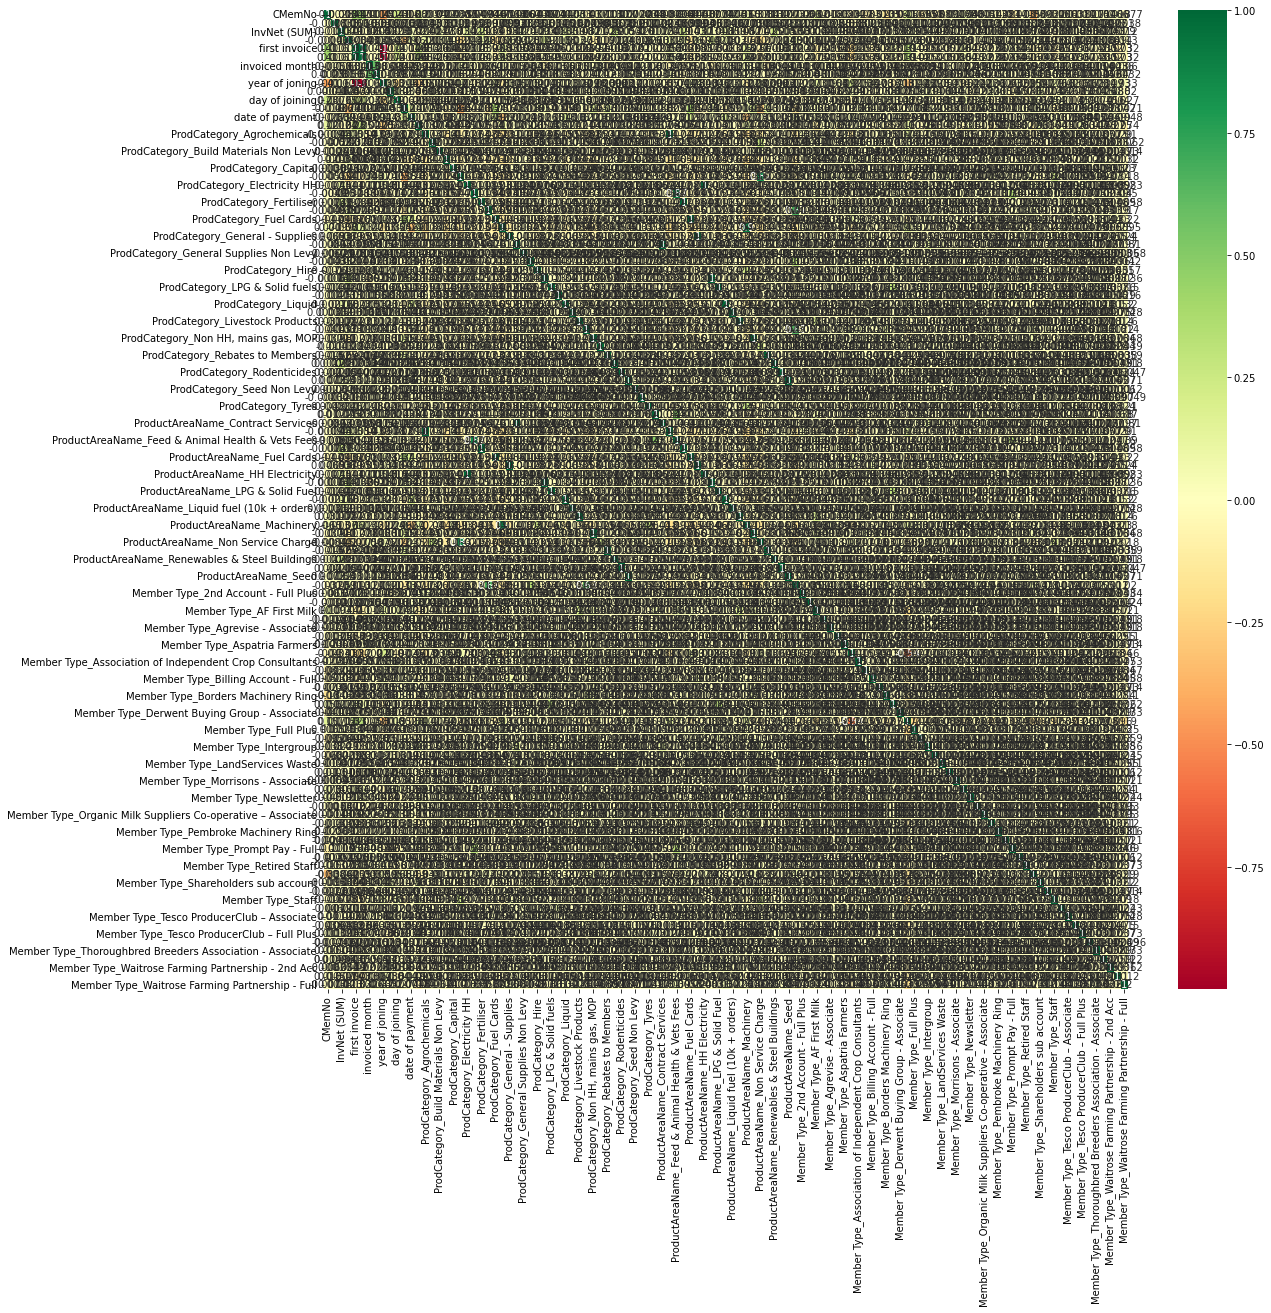

In [220]:
plt.figure(figsize = (18,18))
sns.heatmap(data_train.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [221]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [21]:
cars = ["Ford", "Volvo", "BMW"]

x = len(cars)

print(x)


3


In [28]:
def how_many_seconds(hours):
    return hours*3600

In [29]:
how_many_seconds(1)

3600

In [27]:
cars[2]

'BMW'

In [25]:
print(selection.feature_importances_)

NameError: name 'selection' is not defined

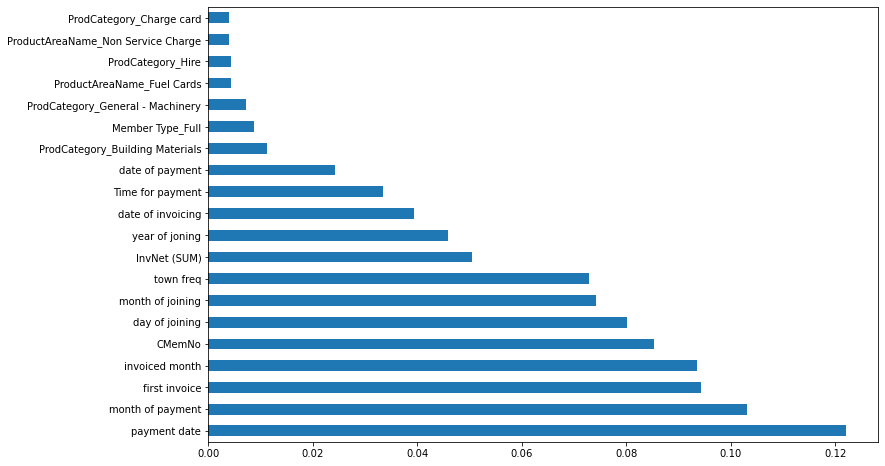

In [223]:
#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [224]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [225]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [226]:
y_pred = reg_rf.predict(X_test)

In [227]:
reg_rf.score(X_train, y_train)

0.9557676317720243

In [280]:
reg_rf.score(X_test, y_test)

0.7031923824831554

C:\Users\mohan-prakashj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



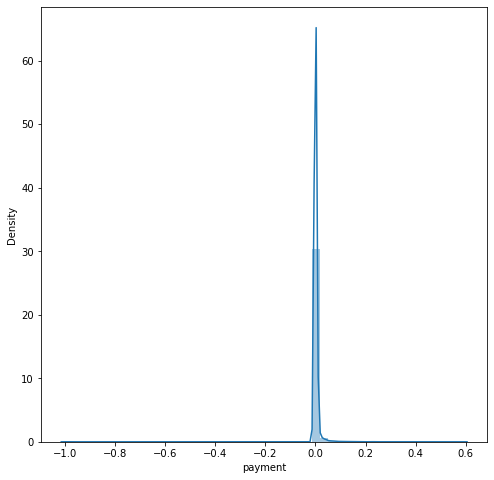

In [229]:
sns.distplot(y_test-y_pred)
plt.show()

In [231]:
for col_name in data_train.columns: 
    print(col_name)

CMemNo
payment
InvNet (SUM)
Time for payment
first invoice
payment date
invoiced month
month of payment
year of joning
month of joining
day of joining
date of invoicing
date of payment
town freq
ProdCategory_Agrochemicals
ProdCategory_Agrochemicals Non Levy
ProdCategory_Build Materials Non Levy
ProdCategory_Building Materials
ProdCategory_Capital
ProdCategory_Charge card
ProdCategory_Electricity HH
ProdCategory_Feed
ProdCategory_Fertiliser
ProdCategory_Fixed & Broadband
ProdCategory_Fuel Cards
ProdCategory_General - Machinery
ProdCategory_General - Supplies
ProdCategory_General Services
ProdCategory_General Supplies Non Levy
ProdCategory_Hardware
ProdCategory_Hire
ProdCategory_Insurance
ProdCategory_LPG & Solid fuels
ProdCategory_Labour
ProdCategory_Liquid
ProdCategory_Liquid 10,000Ltrs+
ProdCategory_Livestock Products
ProdCategory_Mobile
ProdCategory_Non HH, mains gas, MOP
ProdCategory_Non Levy
ProdCategory_Rebates to Members
ProdCategory_Renewable Services
ProdCategory_Rodenticides
P

## Random Forest Classifier

In [233]:
from sklearn import metrics

In [234]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0037530000000000003
MSE: 0.00134433
RMSE: 0.0366651060273934


In [235]:
metrics.r2_score(y_test, y_pred)

0.7031923824831554

In [239]:
from sklearn.model_selection import RandomizedSearchCV

In [236]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()

In [237]:
param_grid={'n_estimators':[int(x) for x in np.linspace(start=200,stop=1200,num=11)],
            'max_features':['auto','sqrt'],
            'max_depth':[int(x) for x in np.linspace(start=10,stop=100,num=11)],
            'min_samples_leaf':[1,2,3,5],
            'min_samples_split':[2,5,10,15]}

In [240]:
random_cv=RandomizedSearchCV(rf_c,param_grid,cv=3,verbose=2,random_state=42)

In [241]:
random_cv.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.0min
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=  59.6s
[CV] END max_depth=91, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time= 1.1min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 1.5min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 1.3min
[CV] END max_depth=91, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=1100; total time= 1.4min
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=  32.0s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=5, min_samples_split=10, n_estima

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 19, 28, 37, 46, 55,
                                                      64, 73, 82, 91, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5],
                                        'min_samples_split': [2, 5, 10, 15],
                                        'n_estimators': [200, 300, 400, 500,
                                                         600, 700, 800, 900,
                                                         1000, 1100, 1200]},
                   random_state=42, verbose=2)

In [242]:
best_random=random_cv.best_estimator_

In [243]:
prediction_cv=best_random.predict(X_test)

In [245]:
from sklearn.metrics import accuracy_score

In [278]:
print('the accuracy score of the ML that is built:',accuracy_score(y_test,prediction_cv))

the accuracy score of the ML that is built: 0.99725


In [250]:
# Save Model Using joblib
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
import joblib

In [251]:
# save the model to disk
filename = 'finalized_model.sav'
joblib.dump(random_cv, filename)

['finalized_model.sav']

In [279]:

# load the model from disk
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print('the accuracy score of the ML that is built:',result)

the accuracy score of the ML that is built: 0.99725


In [255]:
import pickle
# open a file, where you ant to store the data
file = open('churn.pkl', 'wb')

# dump information to that file
pickle.dump(random_cv, file)